In [126]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/dancilla/PYTHON_37/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Problem Statement

**Data Analysis case study**

I am working on a logistic problem where they have faced cancellation of orders in their deliveries. 
Their main goal is to be the 1st prefered delivery partner in Africa.

Main objective is partnership, bringing together both drivers and businesses for the 24hr delivery services.

**Challenge 1**
1. Analyse order cancellations
2. visualize most important aspects using your prefered method.
3. document steps 
4. Insights on how to reduce number of cancelled orders.

**Challenge 2**

-There's been deliberate deletion of data
1. Use the data 2, missed data to predict cancellation reasons for all orders with missing data.
2. Document steps and method used.

**Challenge 3**

create a presentation for the relevant work done.

# Import Packages

In [127]:
##for faster data processing
import numba as nb
import dask as da

#for data manipulation 
import pandas as pd
import numpy as np

##for data visualizations and distributions of the variables
import matplotlib as mtb
import matplotlib.pyplot as plt
from pandas_summary import DataFrameSummary
import scipy as sc
import sklearn as skl
import seaborn as sns

#%matplotlib inline

# Import datasets

In [128]:
query_df = pd.read_csv('../Sendy_data/analysis_df.csv', sep=',')
test_df = pd.read_csv('../Sendy_data/test_df.csv', sep=',')


# EDA

In [131]:
# To view all the columns during EDA
pd.set_option('display.max_columns', 35)

In [132]:
#display the dataset
query_df.head()

,personal_or_business,business_number,vehicle_type,standard_or_express,platform,cancel_reason,cancelled_by,placement_day,placement_time,confirmation_day,confirmation_time,cancellation_day,cancellation_time,distance_(km),pickup_lat,pickup_long,scheduled
0,Personal,-1.0,Bike,Express,android,No driver has been allocated to my request.,Customer,1,17:55:38,1,NaN,1,17:56:35,9,-1.313053,36.841437,OnDemAND
1,Personal,-1.0,Bike,Express,android,My order is not ready.,Customer,1,12:26:27,1,12:27:36,1,12:28:44,14,-1.318959,36.853394,OnDemAND
2,Business,20680.0,Bike,Express,android,I placed the wrong locations.,Customer,1,13:21:18,1,13:21:34,1,13:47:29,16,-1.313854,36.706867,OnDemAND
3,Personal,-1.0,Bike,Express,android,My order is not ready.,Customer,1,10:29:19,1,NaN,1,10:29:29,20,-1.206197,36.778776,OnDemAND
4,Personal,-1.0,Bike,Standard,ios,No Partner,Staff,1,14:34:05,1,14:59:08,1,15:49:41,11,-1.296958,36.808166,OnDemAND


In [133]:
#look at the distribution of each attribute by reviewing summary statistics
query_df.describe()

,business_number,placement_day,confirmation_day,cancellation_day,distance_(km),pickup_lat,pickup_long
count,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000,6393.000000
mean,13810.055060,3.674018,3.674018,3.674018,13.930862,-1.287768,36.814969
std,16276.500407,1.713099,1.713099,1.713099,45.310560,0.067094,0.113884
min,-1.000000,1.000000,1.000000,1.000000,0.000000,-2.390920,32.628902
25%,-1.000000,2.000000,2.000000,2.000000,5.000000,-1.315811,36.786055
50%,-1.000000,4.000000,4.000000,4.000000,9.000000,-1.291188,36.813105
75%,28396.000000,5.000000,5.000000,5.000000,16.000000,-1.263937,36.843238
max,62392.000000,7.000000,7.000000,7.000000,2061.000000,0.551064,40.689788


In [134]:
#look at the number of rows and columns in the dataset
query_df.shape

(6393, 17)

In [135]:
#look at the columns contained in the dataset 
query_df.columns

Index(['personal_or_business', 'business_number', 'vehicle_type',
       'standard_or_express', 'platform', 'cancel_reason', 'cancelled_by',
       'placement_day', 'placement_time', 'confirmation_day',
       'confirmation_time', 'cancellation_day', 'cancellation_time',
       'distance_(km)', 'pickup_lat', 'pickup_long', 'scheduled'],
      dtype='object')

In [136]:
##look at the data types of the variables
query_df.dtypes

personal_or_business     object
business_number         float64
vehicle_type             object
standard_or_express      object
platform                 object
cancel_reason            object
cancelled_by             object
placement_day             int64
placement_time           object
confirmation_day          int64
confirmation_time        object
cancellation_day          int64
cancellation_time        object
distance_(km)             int64
pickup_lat              float64
pickup_long             float64
scheduled                object
dtype: object

In [137]:
#reset index
query_df=query_df.reset_index()

## Boxplot

**Review the spread of each attribute by looking at box and whisker plots.**


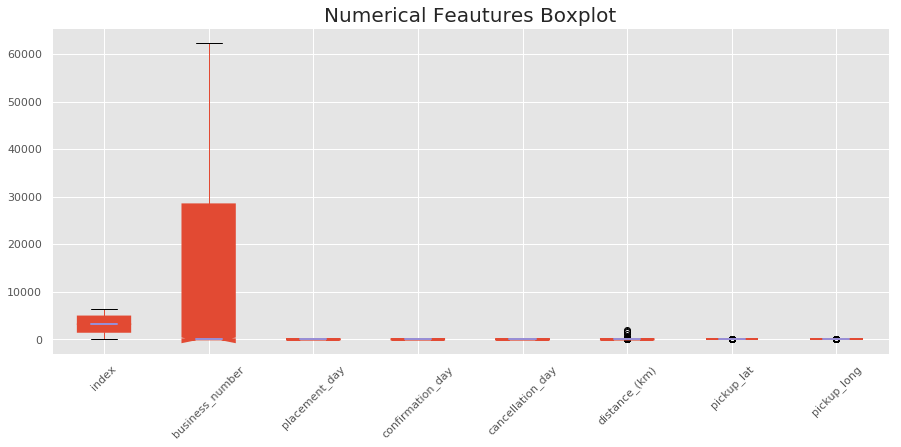

In [138]:
fig=plt.figure(figsize=(15,6))
query_df.boxplot(return_type='axes',
                 patch_artist=True, notch=True,
                    medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .75)
                );
plt.title('Numerical Feautures Boxplot', fontsize=20)
plt.xticks(rotation = 45);

**Show the mean of a few variables**

In [148]:
print ( ( 'The mean pickup (latitude, longitude):\n', query_df[['pickup_lat', 'pickup_long']].mean(axis=0), '\n') )
#print ( ('- Mean customer (customer:', query_df['personal_or_business'].mean(), '\n') )
print ( ('The mean distance traveled (in km):', query_df['distance_(km)'].mean(), '\n') )



('The mean pickup (latitude, longitude):\n', pickup_lat     -1.287768
pickup_long    36.814969
dtype: float64, '\n')
('The mean distance traveled (in km):', 13.930861880181448, '\n')


## Colleration

In [79]:
#show association between variables in the dataframe by plotting a correlation matrix
query_df.corr()

,index,business_number,placement_day,confirmation_day,cancellation_day,distance_(km),pickup_lat,pickup_long
index,1.000000,-0.016740,0.943072,0.943072,0.943072,0.042830,-0.036331,0.056895
business_number,-0.016740,1.000000,-0.024353,-0.024353,-0.024353,-0.041149,-0.066078,0.045934
placement_day,0.943072,-0.024353,1.000000,1.000000,1.000000,0.047666,-0.040651,0.048434
confirmation_day,0.943072,-0.024353,1.000000,1.000000,1.000000,0.047666,-0.040651,0.048434
cancellation_day,0.943072,-0.024353,1.000000,1.000000,1.000000,0.047666,-0.040651,0.048434
distance_(km),0.042830,-0.041149,0.047666,0.047666,0.047666,1.000000,0.032725,-0.014479
pickup_lat,-0.036331,-0.066078,-0.040651,-0.040651,-0.040651,0.032725,1.000000,-0.626917
pickup_long,0.056895,0.045934,0.048434,0.048434,0.048434,-0.014479,-0.626917,1.000000


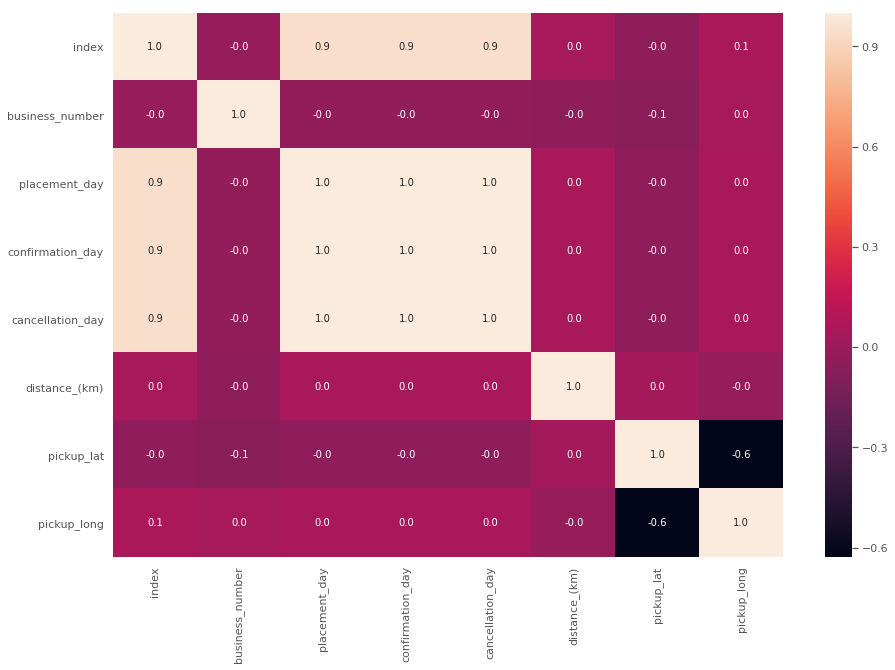

In [80]:
# Plot correlation matrix using a heatmap
#check the relationship between feautures and outputs using the heatmap(correlation) 
plt.figure(figsize=(15,10))
sns.heatmap(query_df.corr(), annot=True, fmt=".1f")
plt.show()


**from the heatmap above we can observe that the days were highly collerated with a 1.0 colleration and the langitude and longitude were the lowest collerated with a -0.6 colleration level**

We can observe that most of the variables are associated or collerated.

when it tends to 1, it shows it has a relation, and as it tends to -1, it shows a weak relation.

## Show the distribution of the platforms customers use to make orders

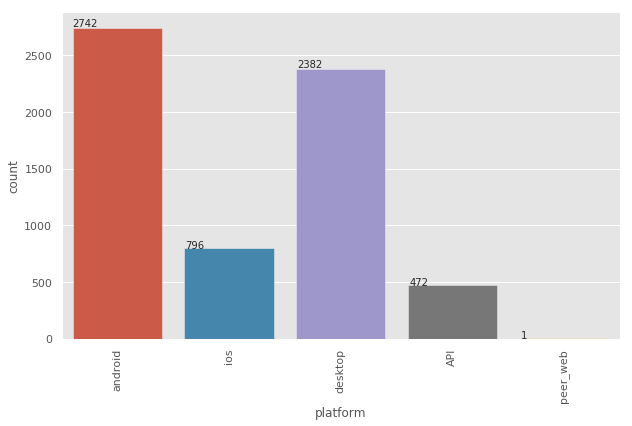

In [82]:
plt.figure(figsize=(10,6))
ax=sns.countplot(data = query_df, x = 'platform')

total = float(len(query_df)) # one person per row
# Add this loop to add the annotations
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.xticks(rotation = 90);


**We can observe that many customers were using android devices followed by the desktop in terms of popular use.
Dig deeper to see between if orders were made by businesses or individuals**

## check on platform vs personal or business

In [83]:
screens_df[screens_df['context_network_carrier']=='P']['name'].value_counts().reset_index().sort_values(by='name', ascending=False)#.plot.bar()

NameError: name 'screens_df' is not defined

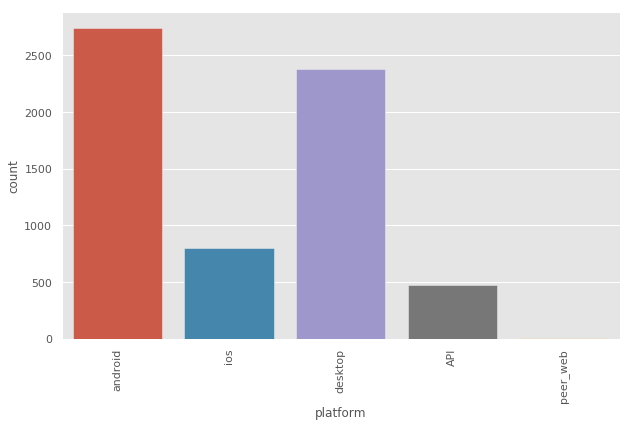

In [84]:
plt.figure(figsize=(10,6))
sns.countplot(data = query_df, x = 'platform')

total = float(len(query_df)) # one person per row

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
             ha="left",
            rotation=45,) ##ha= horizontal alignment
plt.xticks(rotation = 90);


# Analyse the order cancellations

1. look at the most popular order cancel reason
2. look at the relationship between the variables and the cancellation reasons
3. look at the cancel reasons and vehicle type
4. look at the cancel reasons and the platform used
5. look at the person who scheduled vs cancel reasons


In [85]:
#query_df['cancel_reason'].plot(kind='hist', bin=100)
#plt.xlabel("cancel reasons")
query_df['cancel_reason'].describe()

count                                            6393
unique                                              7
top       No driver has been allocated to my request.
freq                                             1773
Name: cancel_reason, dtype: object

In [86]:
query_df['cancel_reason'].value_counts()

No driver has been allocated to my request.    1773
No Partner                                     1293
My order is not ready.                         1212
I placed the wrong locations.                  1113
The driver is too far away.                     594
Customer error                                  337
Delay                                            71
Name: cancel_reason, dtype: int64

**I have observed that  'No driver has been allocated to my request' value on cancel reasons has the highest count of 1773 that is 
27.7% of the total reasons**

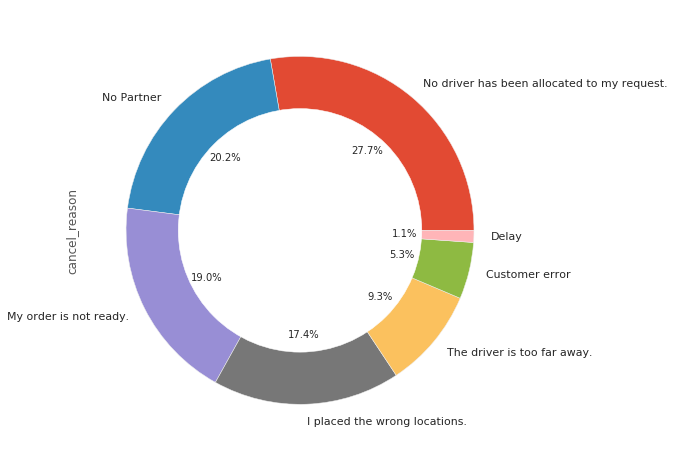

In [87]:
#count the number of rows for each cancel_reason
query_df['cancel_reason'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(10,8))

# add a circle at the center

my_circle=plt.Circle( (0,0), 0.7, color='white')

p=plt.gcf()
p.gca().add_artist(my_circle)
    
plt.xticks(rotation = 90);


**The main reasons for cancellations observed was that no driver has been allocated to my request.**

                                                      cancel_reason  platform
cancel_reason                               platform                         
Customer error                              API                 129       129
                                            android              69        69
                                            desktop             116       116
                                            ios                  23        23
Delay                                       API                   3         3
                                            android              18        18
                                            desktop              34        34
                                            ios                  16        16
I placed the wrong locations.               android             518       518
                                            desktop             470       470
                                            ios                 

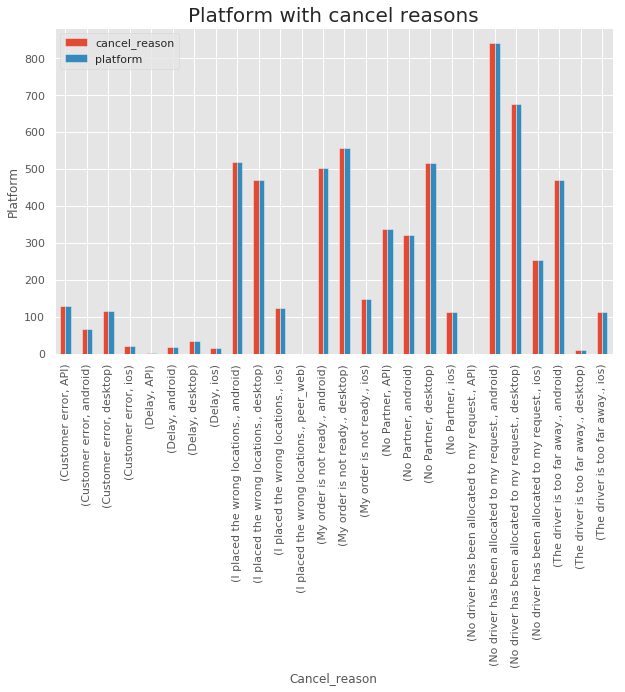

In [88]:
%matplotlib inline
#fig=plt.figure(figsize=(20,10))

print ( query_df.groupby(['cancel_reason','platform'])['cancel_reason','platform'].count() )
from matplotlib.ticker import FuncFormatter
query_df.groupby(['cancel_reason','platform'])['cancel_reason','platform'].count().plot.bar(figsize=(10,6))

plt.xlabel("Cancel_reason")
plt.ylabel("Platform")
plt.title('Platform with cancel reasons', fontsize=20)
plt.xticks(rotation = 90);


In [89]:
query_df['vehicle_type'].value_counts()

Bike             6385
Standard Bike       8
Name: vehicle_type, dtype: int64

This shows that the most popular reason for order cancellation was No driver has been allocated to my request mainly using an android device. 

This followed by No driver has been allocated to my request mainly using a desktop.

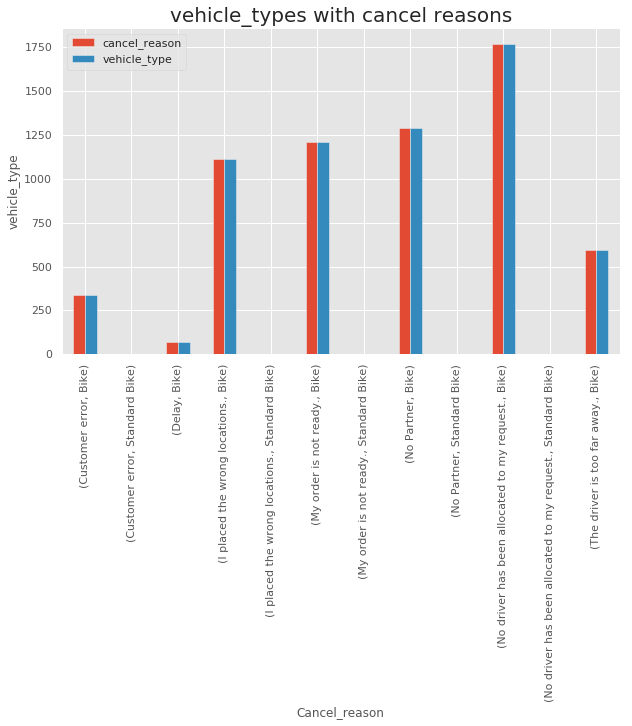

In [90]:
%matplotlib inline
#fig=plt.figure(figsize=(20,10))

from matplotlib.ticker import FuncFormatter
query_df.groupby(['cancel_reason','vehicle_type'])['cancel_reason','vehicle_type'].count().plot.bar(figsize=(10,6))

plt.xlabel("Cancel_reason")
plt.ylabel("vehicle_type")
plt.title('vehicle_types with cancel reasons', fontsize=20)
plt.xticks(rotation = 90);

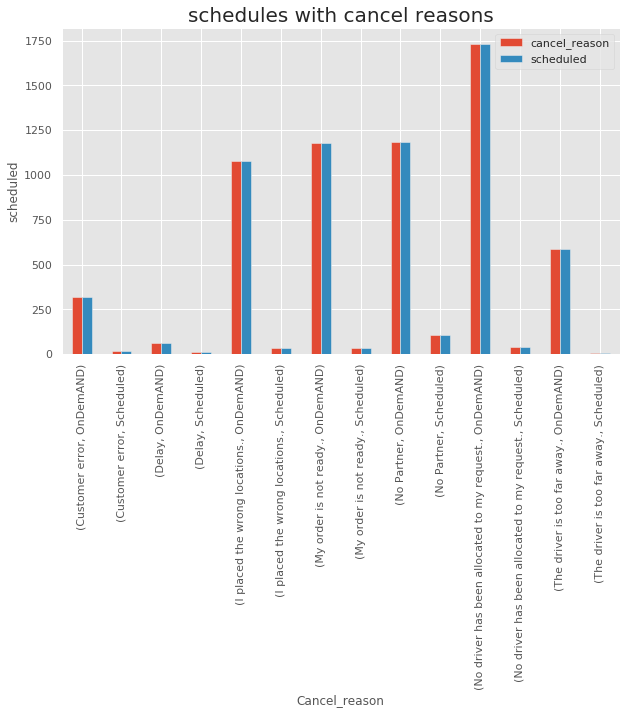

In [91]:
%matplotlib inline
#fig=plt.figure(figsize=(20,10))

from matplotlib.ticker import FuncFormatter
query_df.groupby(['cancel_reason','scheduled'])['cancel_reason','scheduled'].count().plot.bar(figsize=(10,6))

plt.xlabel("Cancel_reason")
plt.ylabel("scheduled")
plt.title('schedules with cancel reasons', fontsize=20)
plt.xticks(rotation = 90);

scheduled
OnDemAND     [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
Scheduled    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

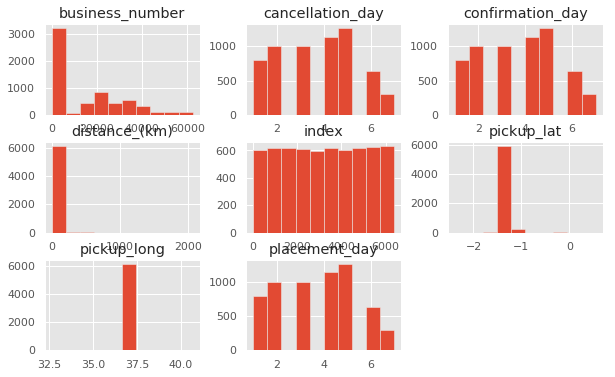

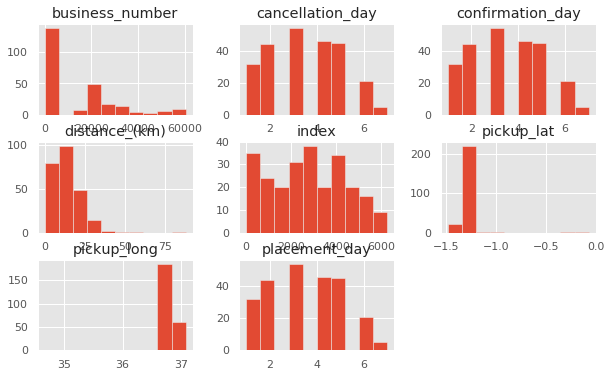

In [92]:
query_df.groupby('scheduled').hist(figsize=(10,6))

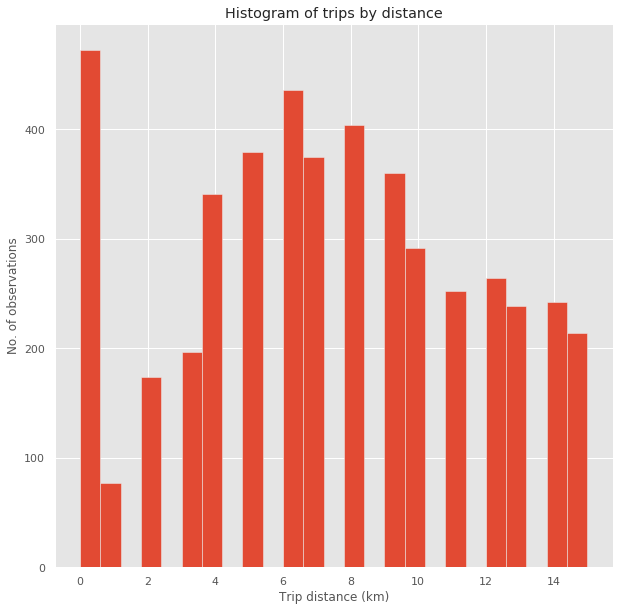

In [93]:
plt.rcParams['figure.figsize'] = (10, 10)
 
plt.hist(query_df['distance_(km)'], bins=25, range=[0, 15]); plt.xlabel('Trip distance (km)')
plt.ylabel('No. of observations'); plt.title('Histogram of trips by distance')
plt.show()
 

 


## check personal or business

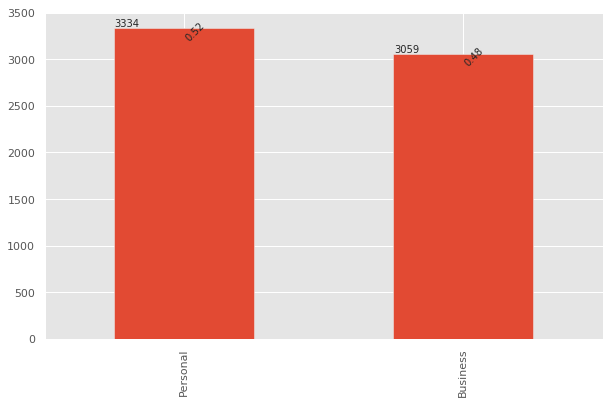

In [94]:
# plot number of trip at each category
fig= plt.figure(figsize=(10,6))
ax = query_df['personal_or_business'].value_counts().plot(kind='bar')

# Add this loop to add the annotations
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

total = float(len(query_df)) # one person per row
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
             ha="left",
            rotation=45,) ##ha= horizontal alignment

/home/dancilla/PYTHON_37/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x1080 with 0 Axes>

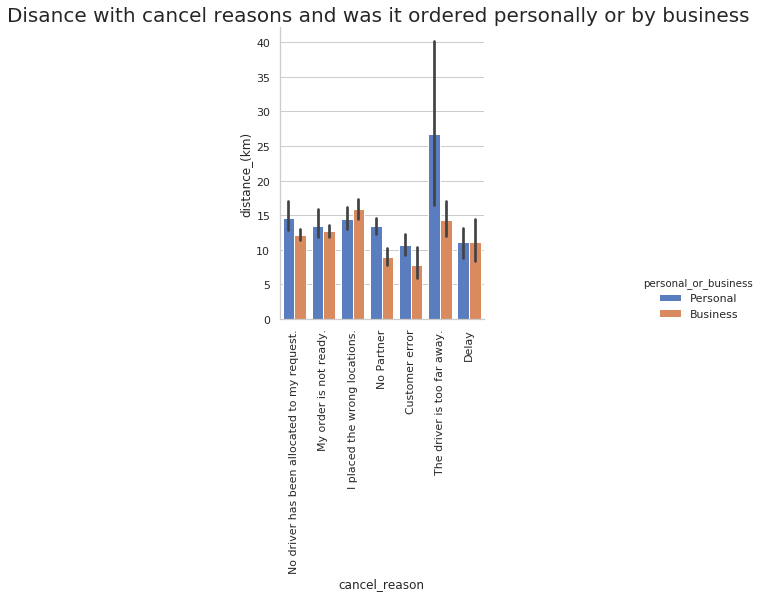

In [95]:
import seaborn as sns
fig= plt.figure(figsize=(15,15))

sns.set(style="whitegrid")
g = sns.factorplot(x="cancel_reason", y="distance_(km)", hue="personal_or_business", data=query_df, kind="bar", palette="muted")
plt.title('Disance with cancel reasons and was it ordered personally or by business ', fontsize=20)
plt.xticks(rotation = 90);

### vehicle type, distance  vs cancel reason

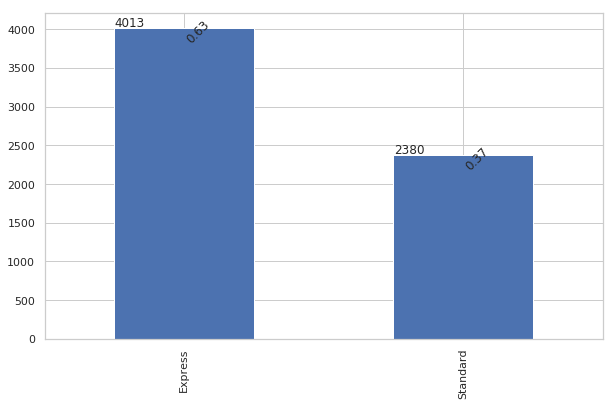

In [96]:
# plot number of trip at each category
fig= plt.figure(figsize=(10,6))
ax = query_df['standard_or_express'].value_counts().plot(kind='bar')

# Add this loop to add the annotations
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

total = float(len(query_df)) # one person per row
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
             ha="left",
            rotation=45,) ##ha= horizontal alignment

/home/dancilla/PYTHON_37/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x1080 with 0 Axes>

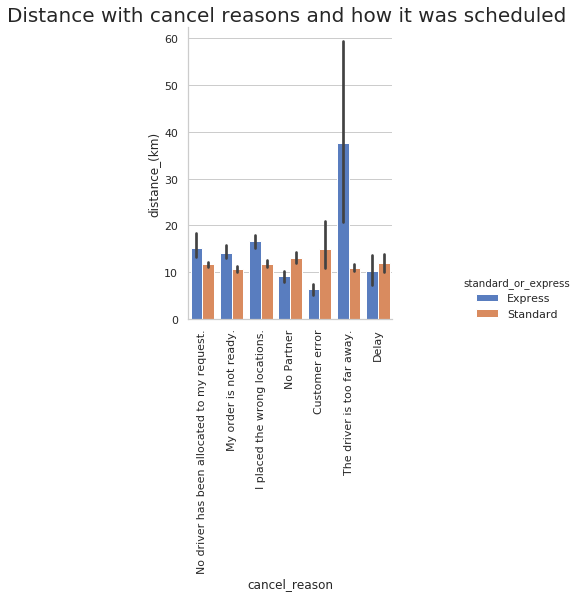

In [97]:
import seaborn as sns
fig= plt.figure(figsize=(15,15))

sns.set(style="whitegrid")
g = sns.factorplot(x="cancel_reason", y="distance_(km)", hue="standard_or_express", data=query_df, kind="bar", palette="muted")
plt.title('Distance with cancel reasons and how it was scheduled ', fontsize=20)
plt.xticks(rotation = 90);

### scheduled 

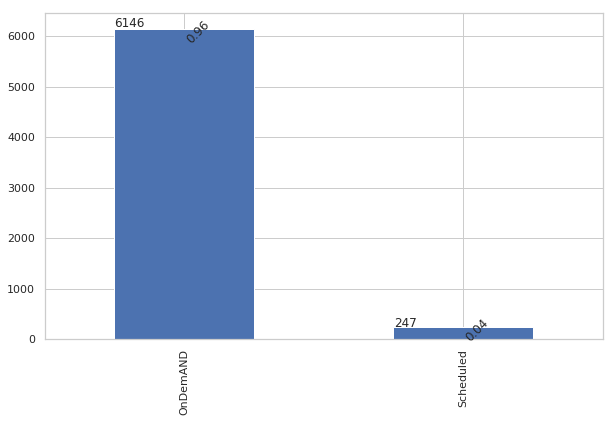

In [98]:
# plot number of trip at each category
fig= plt.figure(figsize=(10,6))
ax = query_df['scheduled'].value_counts().plot(kind='bar')

# Add this loop to add the annotations
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

total = float(len(query_df)) # one person per row
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
             ha="left",
            rotation=45,) ##ha= horizontal alignment

/home/dancilla/PYTHON_37/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x1080 with 0 Axes>

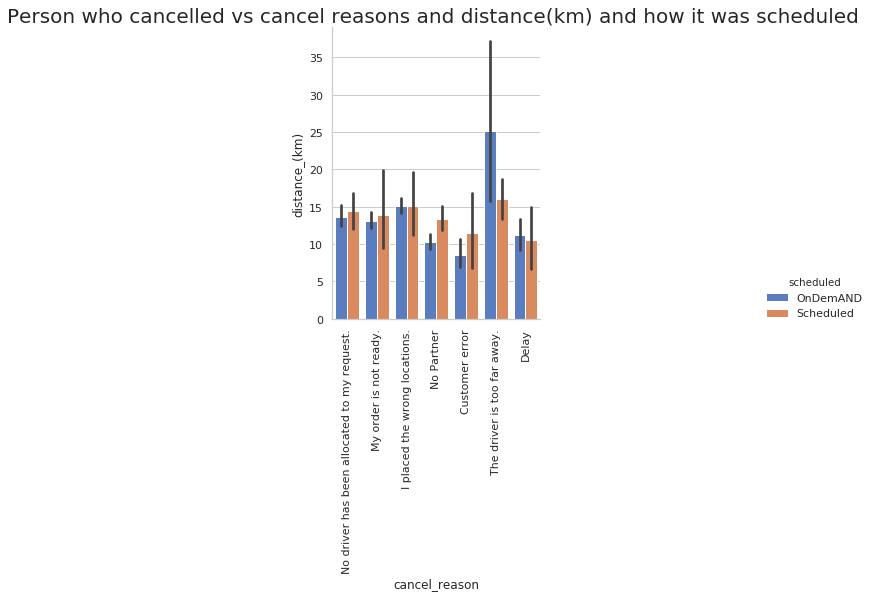

In [99]:
import seaborn as sns
fig= plt.figure(figsize=(15,15))

sns.set(style="whitegrid")
g = sns.factorplot(x="cancel_reason", y="distance_(km)", hue="scheduled", data=query_df, kind="bar", palette="muted")
plt.title('Person who cancelled vs cancel reasons and distance(km) and how it was scheduled ', fontsize=20)
plt.xticks(rotation = 90);

In this graph, we can observe that main reason of order cancellation mainly by the customer was that the driver was too far, prders such as delay, customer error and no partner were cancelled by staff and the rest were done by the customers. 
customer cancellation is observed to be higher than that of the staff members 

# Timelines

**placement times- see which time was more popular in placing orders**

In [100]:
query_df['cancellation_time'] = pd.to_datetime(query_df['cancellation_time'])
tmp2_df =query_df
tmp2_df = tmp2_df.reset_index()
tmp2_df = tmp2_df.groupby(
    tmp2_df['cancellation_time'].dt.strftime('%H:%M'))['index'].count().reset_index()
tmp2_df
tmp2_df.columns = ['cancellation_time', 'cancel_reason']
tmp2_df[['cancellation_time', 'cancel_reason']].to_csv("tmp2_df.csv", sep=",")

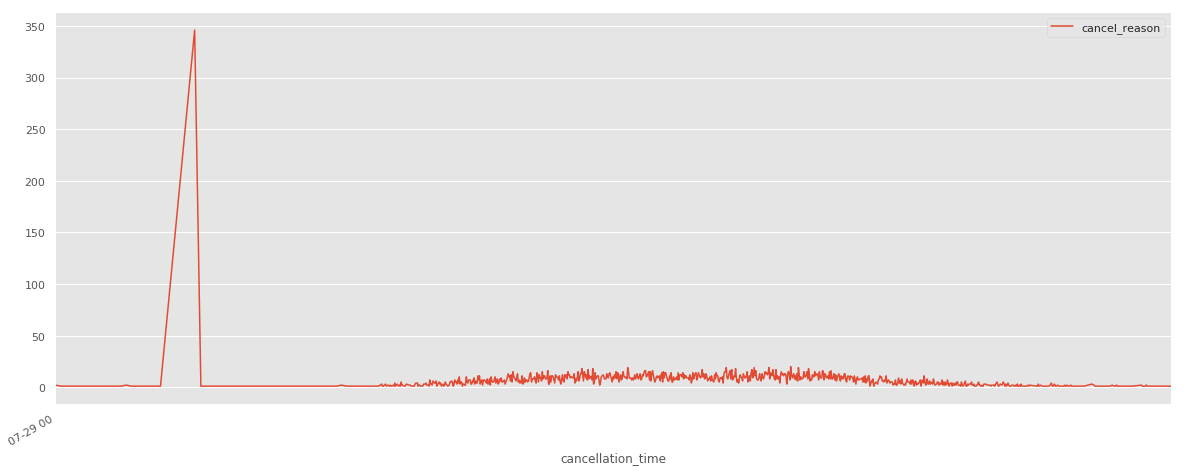

In [101]:
import matplotlib.dates as mdates
%matplotlib inline

#set ggplot style
plt.style.use('ggplot')

#read data from csv
tmp2_df = pd.read_csv('tmp2_df.csv', usecols=['cancellation_time', 'cancel_reason'], parse_dates=['cancellation_time'], sep=",")

#set date as index
tmp2_df.set_index('cancellation_time', inplace=True)

#plot data
fig, ax = plt.subplots(figsize=(20,8))
#ax.bar(tmp2_df.index, tmp2_df['name'])
tmp2_df.plot(ax=ax)

#set ticks every hour
#format date
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 6)))
#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=2))


In [102]:
query_df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['index', 'personal_or_business', 'business_number', 'vehicle_type',
       'standard_or_express', 'platform', 'cancel_reason', 'cancelled_by',
       'placement_day', 'placement_time', 'confirmation_day',
       'confirmation_time', 'cancellation_day', 'cancellation_time',
       'distance_(km)', 'pickup_lat', 'pickup_long', 'scheduled'],
      dtype='object')>

## check the distance when the order was cancelled by the personal using group by and sort values

In [103]:
query_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6393 entries, 0 to 6392
Data columns (total 18 columns):
index                   6393 non-null int64
personal_or_business    6393 non-null object
business_number         6393 non-null float64
vehicle_type            6393 non-null object
standard_or_express     6393 non-null object
platform                6393 non-null object
cancel_reason           6393 non-null object
cancelled_by            6393 non-null object
placement_day           6393 non-null int64
placement_time          6393 non-null object
confirmation_day        6393 non-null int64
confirmation_time       2879 non-null object
cancellation_day        6393 non-null int64
cancellation_time       6393 non-null datetime64[ns]
distance_(km)           6393 non-null int64
pickup_lat              6393 non-null float64
pickup_long             6393 non-null float64
scheduled               6393 non-null object
dtypes: datetime64[ns](1), float64(3), int64(5), object(9)
memory usage: 899.

**Change the timelines to pandas datetime**

In [104]:
query_df['placement_time'] = pd.to_datetime(query_df['placement_time'])


In [105]:
query_df['confirmation_time'] = pd.to_datetime(query_df['confirmation_time'])


**create new columns in regards to timelines**

In [119]:
#column represents the time difference between when order was placed and when it was confirmed
query_df['order_timedelta'] = query_df['placement_time']-query_df['confirmation_time']

In [120]:
#column represents the time difference between when order was placed and when it was cancelled
query_df['processing_timedelta']=query_df['placement_time']-query_df['cancellation_time']

In [121]:
#column represents the time difference between when order was confirmed and when it was confirmed
query_df['confirmation_timedelta']=query_df['confirmation_time']-query_df['cancellation_time']

**Display the timeline observations taken before an order was cancelled**

In [124]:
#Its observed that the highest duration between when order was placed and when it was confirmed was 16hrs, 30 min,24 seconds. 
#The average time taken for was 23 hours 38 min 38 seconds.
query_df['order_timedelta'].describe()

count                        2879
mean     -1 days +23:38:38.683570
std        0 days 01:21:21.356310
min             -1 days +14:59:09
25%      -1 days +23:35:58.500000
50%             -1 days +23:56:58
75%             -1 days +23:59:17
max               0 days 16:30:24
Name: order_timedelta, dtype: object

In [125]:
##Its observed that the highest duration between when order was placed and when it was confirmed was 20hrs, 55 min,44 seconds. 
#The average time taken for was 06 min 38 seconds.

query_df['processing_timedelta'].describe()

count                      6393
mean     0 days 00:06:09.024870
std      0 days 03:33:11.244996
min           -1 days +12:58:51
25%           -1 days +23:16:10
50%           -1 days +23:50:28
75%           -1 days +23:58:58
max             0 days 20:55:44
Name: processing_timedelta, dtype: object

In [118]:
##Its observed that the highest duration between when order was placed and when it was confirmed was 17hrs, 11 min,35 seconds. 
#The average time taken for was 23hrs, 41 min 56 seconds.

query_df['confirmation_timedelta'].describe()

count                        2879
mean     -1 days +23:41:56.723167
std        0 days 02:01:34.939269
min             -1 days +13:01:48
25%             -1 days +23:18:33
50%             -1 days +23:44:11
75%             -1 days +23:57:02
max               0 days 17:11:35
Name: confirmation_timedelta, dtype: object

In [109]:
query_df.head()

,index,personal_or_business,business_number,vehicle_type,standard_or_express,platform,cancel_reason,cancelled_by,placement_day,placement_time,confirmation_day,confirmation_time,cancellation_day,cancellation_time,distance_(km),pickup_lat,pickup_long,scheduled,order_timedelta,processing_timedelta,confirmation_timedelta
0,0,Personal,-1.0,Bike,Express,android,No driver has been allocated to my request.,Customer,1,2019-07-29 17:55:38,1,NaT,1,2019-07-29 17:56:35,9,-1.313053,36.841437,OnDemAND,NaT,-1 days +23:59:03,NaT
1,1,Personal,-1.0,Bike,Express,android,My order is not ready.,Customer,1,2019-07-29 12:26:27,1,2019-07-29 12:27:36,1,2019-07-29 12:28:44,14,-1.318959,36.853394,OnDemAND,-1 days +23:58:51,-1 days +23:57:43,-1 days +23:58:52
2,2,Business,20680.0,Bike,Express,android,I placed the wrong locations.,Customer,1,2019-07-29 13:21:18,1,2019-07-29 13:21:34,1,2019-07-29 13:47:29,16,-1.313854,36.706867,OnDemAND,-1 days +23:59:44,-1 days +23:33:49,-1 days +23:34:05
3,3,Personal,-1.0,Bike,Express,android,My order is not ready.,Customer,1,2019-07-29 10:29:19,1,NaT,1,2019-07-29 10:29:29,20,-1.206197,36.778776,OnDemAND,NaT,-1 days +23:59:50,NaT
4,4,Personal,-1.0,Bike,Standard,ios,No Partner,Staff,1,2019-07-29 14:34:05,1,2019-07-29 14:59:08,1,2019-07-29 15:49:41,11,-1.296958,36.808166,OnDemAND,-1 days +23:34:57,-1 days +22:44:24,-1 days +23:09:27


**Create new columns in regards to days**

In [110]:
query_df['order_period'] = query_df['placement_day']-query_df['confirmation_day']


In [111]:
#create column that shows the order period 
query_df['processing_period']=query_df['placement_day']-query_df['cancellation_day']


In [112]:
query_df['confirmation_period']=query_df['confirmation_day']-query_df['cancellation_day']


In [113]:
query_df['confirmation_period'].value_counts()

0    6393
Name: confirmation_period, dtype: int64

Looking at the value counts  for order period and processing period and confirmation period it shows orders were
made at the same day.

AxesSubplot(0.125,0.125;0.775x0.755)


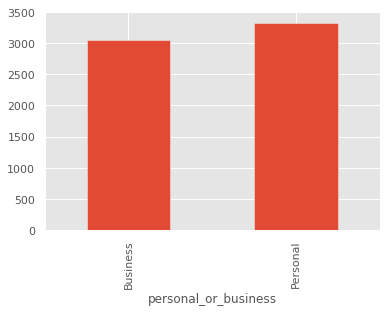

In [38]:
pers_bus_df=query_df.groupby('personal_or_business').size().plot.bar()
# Add this loop to add the annotations or totals
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

print(pers_bus_df)




# Recommendation

Main insight to give is to improve on the driver allocation by allocating drivers who are at a close distance with the customer so as to reduce
the number of customers cancelling orders.
secondly, the duration between the 